---
---

# **1 -  Data Set**

Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Read Data Set

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Data_Science/Dataset/Iris/Dataset_Iris.csv', sep=';')

Print 5 baris pertama

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,4.3,3.0,1.1,0.1,Iris-setosa
1,7,4.4,3.0,1.3,0.2,Iris-setosa
2,8,4.4,3.2,1.3,0.2,Iris-setosa
3,11,4.4,NaN,1.4,0.2,Iris-setosa
4,30,4.5,2.3,1.3,0.3,Iris-setosa


Cek Ukuran Data Set

In [4]:
df.shape

(135, 6)

Drop Id column

In [5]:
df = df.drop('Id', axis=1)

Info Data Set

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  130 non-null    float64
 1   SepalWidthCm   132 non-null    float64
 2   PetalLengthCm  133 non-null    float64
 3   PetalWidthCm   132 non-null    float64
 4   Species        135 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.4+ KB


Copy Dataset

In [7]:
df_copy = df.copy()

---
---

# **2 - Exploratory Data Analysis and Feature Engineering**

## **A. Dealing with Missing Value**

Cek Missing Value

In [8]:
df_copy.isnull().sum()

SepalLengthCm    5
SepalWidthCm     3
PetalLengthCm    2
PetalWidthCm     3
Species          0
dtype: int64

Cek Outlier dengan boxplot

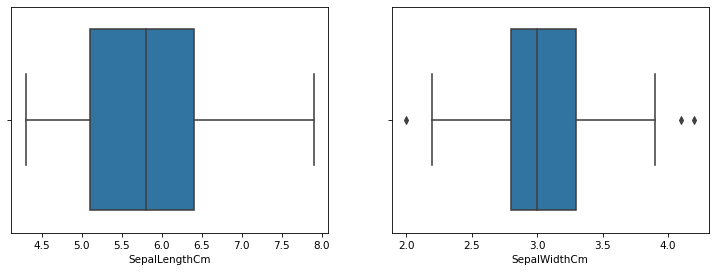

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12,4), dpi=75)

for i in range(2):
    sns.boxplot(x=df_copy.drop('Species',axis=1).columns[i], data=df_copy, ax=axes[i])

Sepal Width memilki outlier

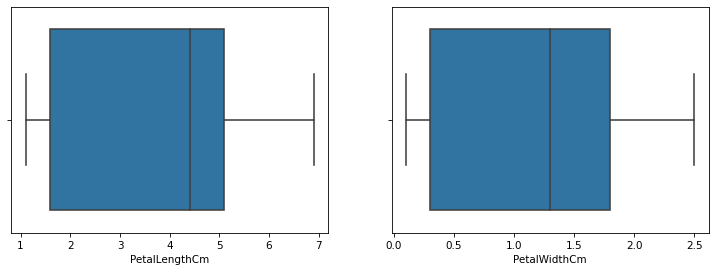

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12,4), dpi=75)

for i in range(2):
  sns.boxplot(x=df_copy.drop('Species',axis=1).columns[i+2], data=df_copy, ax=axes[i])

Cek Descriptive Statistics

In [11]:
df_copy.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,130.0,5.838462,0.842052,4.3,5.1,5.8,6.4,7.9
SepalWidthCm,132.0,3.037121,0.416163,2.0,2.8,3.0,3.3,4.2
PetalLengthCm,133.0,3.790226,1.762439,1.1,1.6,4.4,5.1,6.9
PetalWidthCm,132.0,1.207576,0.768822,0.1,0.3,1.3,1.8,2.5


Karena Sepal Length, Sepal Width dan Petal Width memiliki mean dan median yang hampir sama serta karena adanya outlier, maka fill missing value dengan median dari masing-masing feature dianggap lebih aman.


In [12]:
df_copy['SepalLengthCm'] = df_copy['SepalLengthCm'].fillna(df_copy['SepalLengthCm'].median())
df_copy['SepalWidthCm'] = df_copy['SepalWidthCm'].fillna(df_copy['SepalWidthCm'].median())
df_copy['PetalWidthCm'] = df_copy['PetalWidthCm'].fillna(df_copy['PetalWidthCm'].median())

Cek persentase missing value

In [13]:
np.round(100 * (df_copy.isnull().sum() / len(df_copy)),2)

SepalLengthCm    0.00
SepalWidthCm     0.00
PetalLengthCm    1.48
PetalWidthCm     0.00
Species          0.00
dtype: float64

Karena percentase missing value hanya 1.48% maka drop baris tersebut

In [14]:
df_copy = df_copy.dropna()

Cek ulang missing value

In [15]:
df_copy.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Update dataframe setelah di clean

In [16]:
df_clean = df_copy.copy()

---

## **B. Label Count**

Plot jumlah tiap spesies

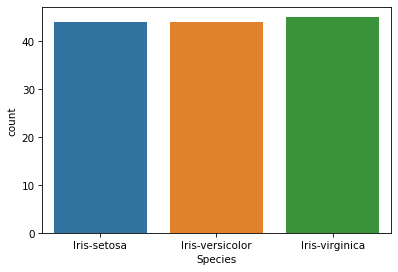

In [17]:
plt.figure(figsize=(6,4),dpi=75)
sns.countplot(data=df_clean, x='Species');

In [18]:
df_clean['Species'].value_counts()

Iris-virginica     45
Iris-versicolor    44
Iris-setosa        44
Name: Species, dtype: int64

Data set memiliki balance target (memiliki jumlah target yang hampir sama)

---

## **C. Features Correlation**

Plot korelasi antar feature

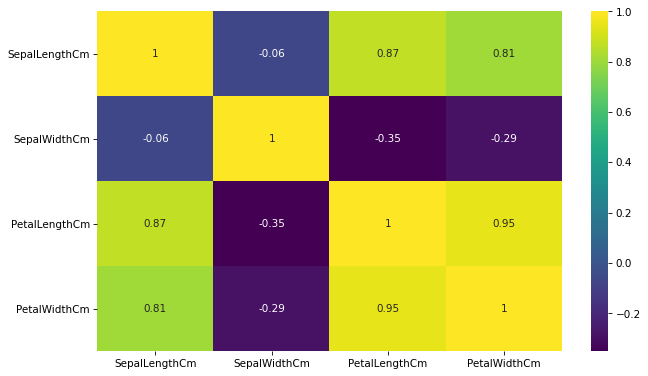

In [19]:
plt.figure(figsize=(10,6),dpi=75)
sns.heatmap(np.round(df_clean.corr(),2), annot=True, cmap='viridis')
plt.yticks(rotation=0);

Berdasarkan grafik korelasi diatas, Sepal Width memiliki korelasi negatif (jika Sepal Width semakin besar maka 3 feature lainnya semakin kecil dan sebaliknya) terhadap ketiga feature lainnya.

Sedangkan 3 feature lainnya memilki korelasi positif satu sama lain.

---

## **D. Features Relationship**

Plot hubungan dan distribusi tiap feature

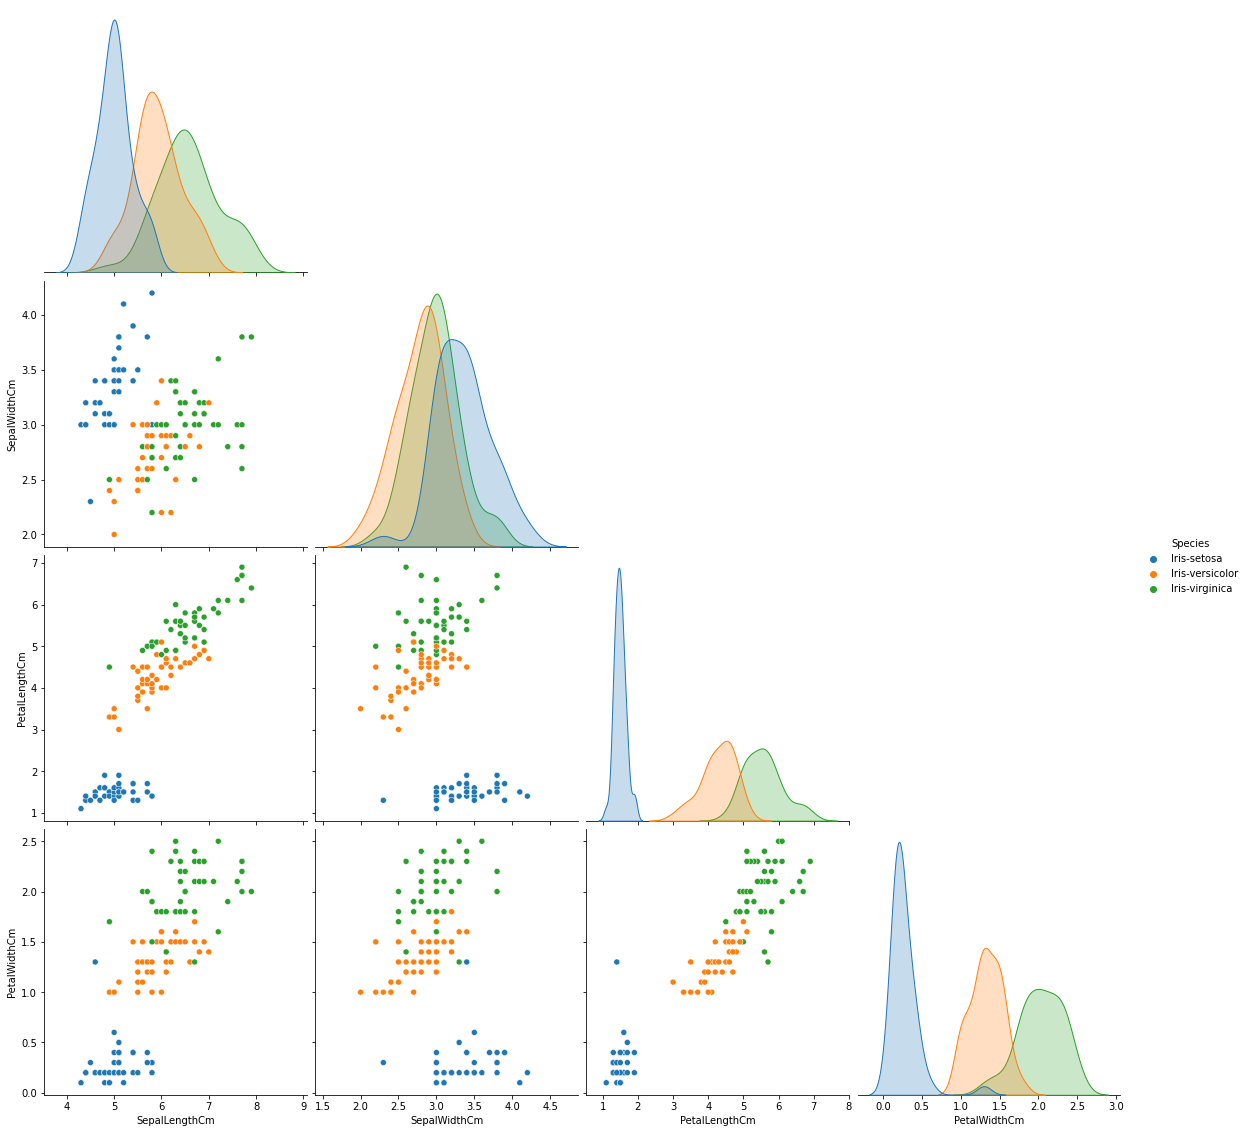

In [20]:
sns.pairplot(df_clean, hue='Species', corner=True, height=4);

Berdasarkan grafik diatas, feature pada Iris mudah untuk dipisahkan (memili separasi yang jelas) dan semua feature cenderung memilki distribusi normal meskipun beberapa spesies ada yang skew.

Mari kita zoom salah satu feature yang mudah diamati

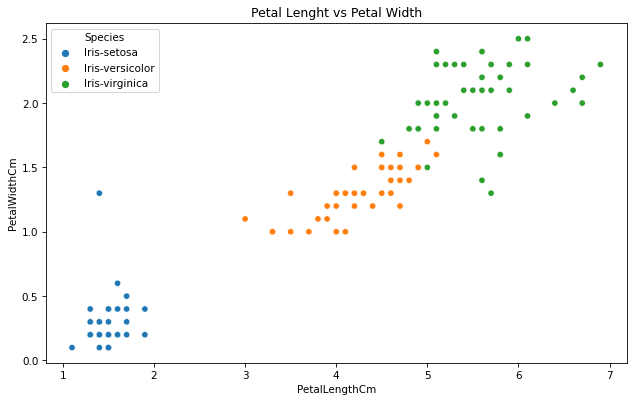

In [21]:
plt.figure(figsize=(10,6),dpi=75)
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', data=df_clean, hue='Species')
plt.title('Petal Lenght vs Petal Width');

Berdasarkan grafik Petal Length vs Petal Width, kita dapat dengan mudah mengenali tiap spesiesnya.

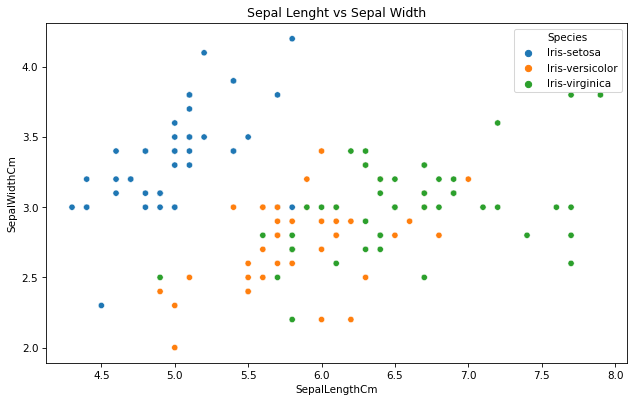

In [22]:
plt.figure(figsize=(10,6),dpi=75)
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=df_clean, hue='Species')
plt.title('Sepal Lenght vs Sepal Width');

Untuk feature Sepal Length dan Sepal Width cukup susah untuk dikenali tetapi tetap bisa dipisahkan dengan cara mentransformasi ke dimensi yang lebih tinggi misalnya 3D dimension.

---
---

# **3 - Machine Learning Model**

## **A. Setup**

### **a. Train | Test Split**

Kita split data agar model dapat meng-evaluasi secara fair dan menghindari overfitting

In [23]:
X = df_clean.drop('Species',axis=1)
y = df_clean['Species']

In [24]:
from sklearn.model_selection import train_test_split

Split dengan rasio test size sebesar 25% dari keseluruhan data

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [26]:
X_train.shape

(99, 4)

In [27]:
X_test.shape

(34, 4)

---

### **b. Standardization**

Scale data agar memiliki mean = 0 dan standard deviasi = 1

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

Fit dan Transform hanya pada training data untuk menghindari data leakage ke test data

In [30]:
scaled_X_train = scaler.fit_transform(X_train)

In [31]:
scaled_X_test = scaler.transform(X_test)

---

## **B. Base Model Comparison**

Kita cari model yang memiliki score tertinggi berdasarkan cross validation

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [33]:
model_list = [('Log_Reg', LogisticRegression()), 
              ('KNN', KNeighborsClassifier()), 
              ('SVC', SVC()), 
              ('DT', DecisionTreeClassifier()), 
              ('RF', RandomForestClassifier()), 
              ('AB', AdaBoostClassifier())]

In [34]:
from sklearn.model_selection import cross_val_score

for name, model in model_list:
  scores = cross_val_score(model, scaled_X_train, y_train,
                           scoring='accuracy', cv=5)
  print(f'{name:<7}: {scores.mean():.5f}')

Log_Reg: 0.95947
KNN    : 0.96947
SVC    : 0.96947
DT     : 0.91947
RF     : 0.95947
AB     : 0.94000


SVC (Support Vector Classifier) dan KNN (K Nearest Neighbors) memilki score tertinggi, coba kita gunakan SVC sebagai model kita

---

## **C. SVC with GridSearch**

Deklarasi SVC model

In [35]:
svc = SVC()

Gunakan Grid Search untuk mencari parameter terbaik untuk SVC

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
param_grid = {'C':[0.01, 0.1, 1, 5, 10], # parameter regularization
              'kernel':['linear','rbf'],
              'gamma':['scale','auto']}

In [38]:
grid_svc_model = GridSearchCV(svc,
                              param_grid,
                              cv=5)

---

### **a. Train Model**

In [39]:
grid_svc_model.fit(scaled_X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 5, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

---

### **b. Model Best Parameters**

In [40]:
grid_svc_model.best_params_

{'C': 5, 'gamma': 'scale', 'kernel': 'linear'}

---

### **c. Performance Evaluation**

Dengan menggunakan Test Data (Hold-out data), mari kita evaluasi model kita

In [41]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [42]:
y_pred = grid_svc_model.predict(scaled_X_test)

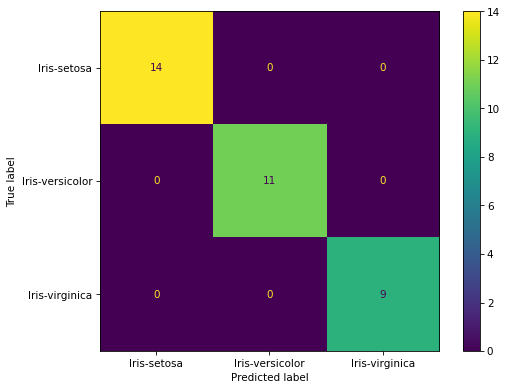

In [43]:
fig, ax = plt.subplots(figsize=(8,6), dpi=75)
plot_confusion_matrix(grid_svc_model, scaled_X_test, y_test, ax=ax, values_format='d')
plt.show()

Tiap spesies dapat diprediksi dengan tepat

In [44]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        34
      macro avg       1.00      1.00      1.00        34
   weighted avg       1.00      1.00      1.00        34



Model memiliki performa yang baik dengan precision, recall dan f1 score bernilai 1

---
---

# **4 - Finalizing Model**

Buat pipeline untuk model dengan menggunakan best parameter dari GridSearch

In [48]:
scaler = StandardScaler()

In [49]:
svc = SVC(C=5, gamma='scale', kernel= 'linear')

---

## **A. Using Pipeline**

Gunakan pipeline untuk mempermudah penggunaan model

In [50]:
from sklearn.pipeline import Pipeline

In [51]:
svc_pipe = Pipeline([('scaler', scaler), 
                     ('svc', svc)])

In [52]:
svc_pipe.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

---

## **B. Prediction on New Data**
Gunakan model yang telah kita buat untuk memprediksi data baru (tidak pernah dilihat oleh model)

Read data baru dari Data iris submission.csv

In [64]:
col_list = X.columns
new_data = pd.read_csv('/content/drive/MyDrive/Data_Science/Dataset/Iris/Data_iris_submission.csv', sep=';', usecols=col_list)
new_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,4.6,3.6,1.0,0.2
1,5.0,3.2,1.2,0.2
2,5.8,4.0,1.2,0.2
3,5.3,3.7,1.5,0.2
4,5.4,3.7,1.5,0.2
5,5.6,2.9,3.6,1.3
6,5.5,2.3,4.0,1.3
7,5.2,2.7,3.9,1.4
8,6.6,3.0,4.4,1.4
9,6.7,3.1,4.4,1.4


Hasil prediksi model pada data baru

In [63]:
prediction = svc_pipe.predict(new_data)
pd.Series(prediction)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5     Iris-versicolor
6     Iris-versicolor
7     Iris-versicolor
8     Iris-versicolor
9     Iris-versicolor
10     Iris-virginica
11     Iris-virginica
12     Iris-virginica
13    Iris-versicolor
14     Iris-virginica
dtype: object

---
---